In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining the workspace
x = np.linspace(-10,10,500)
z = np.linspace(0,30,500)

Z, X = np.meshgrid(z,x)

In [3]:
x_prime = 4

distances = np.sqrt(  (X-x_prime)**2 + Z**2  )

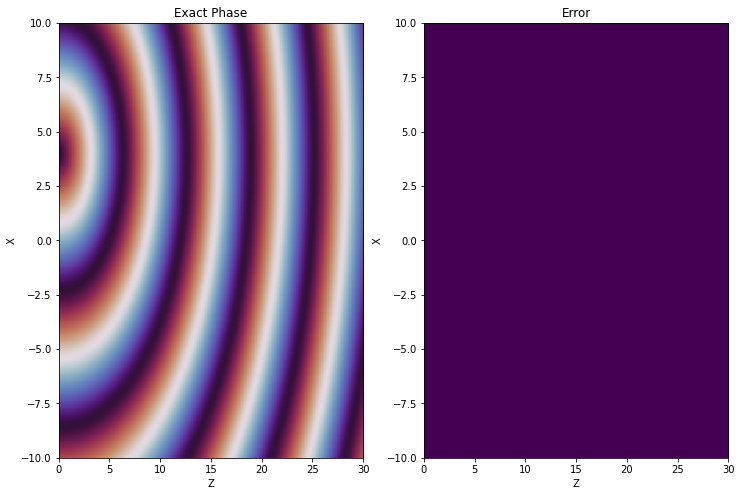

In [4]:
fig, ax = plt.subplots(ncols=2)

fig.set_size_inches(int(1.6*8),8)

#Exact results
ax[0].set_title("Exact Phase")
ax[0].set_ylabel("X")
ax[0].set_xlabel("Z")
ax[0].pcolorfast(z, x,
        np.angle(  np.exp(  1j*distances  )  ), cmap='twilight'  )

ax[1].set_title(  "Error"  )
ax[1].set_ylabel(  "X"  )
ax[1].set_xlabel(  "Z"  )
ax[1].pcolorfast(z, x,
        np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*distances  )  ), cmap='viridis' )

## Questions

<ipython-input-5-1d69cfb9edbb>:3: RuntimeWarning: divide by zero encountered in true_divide
  r_Fresnel = Z + 1/(  2*Z  )*(  X - x_prime  )**2
<ipython-input-5-1d69cfb9edbb>:4: RuntimeWarning: divide by zero encountered in true_divide
  r_Franhofer = Z + 1/(  2*Z  )*(  X**2 - 2*X*x_prime  )
<ipython-input-5-1d69cfb9edbb>:15: RuntimeWarning: invalid value encountered in multiply
  np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )
<ipython-input-5-1d69cfb9edbb>:21: RuntimeWarning: invalid value encountered in multiply
  np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )


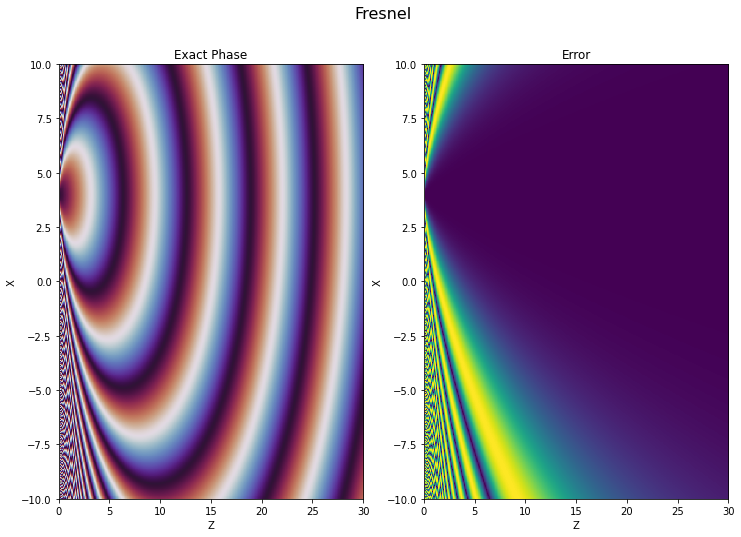

In [5]:
#a

r_Fresnel = Z + 1/(  2*Z  )*(  X - x_prime  )**2
r_Franhofer = Z + 1/(  2*Z  )*(  X**2 - 2*X*x_prime  )

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(int(1.6*8),8)
fig.suptitle(  "Fresnel", fontsize=16)

#Exact results
ax[0].set_title("Exact Phase")
ax[0].set_ylabel("X")
ax[0].set_xlabel("Z")
ax[0].pcolorfast(z, x,
        np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )

ax[1].set_title(  "Error"  )
ax[1].set_ylabel(  "X"  )
ax[1].set_xlabel(  "Z"  )
ax[1].pcolorfast(z, x,
        np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )


<ipython-input-6-3fd189287cb8>:10: RuntimeWarning: invalid value encountered in multiply
  np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )
<ipython-input-6-3fd189287cb8>:16: RuntimeWarning: invalid value encountered in multiply
  np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )


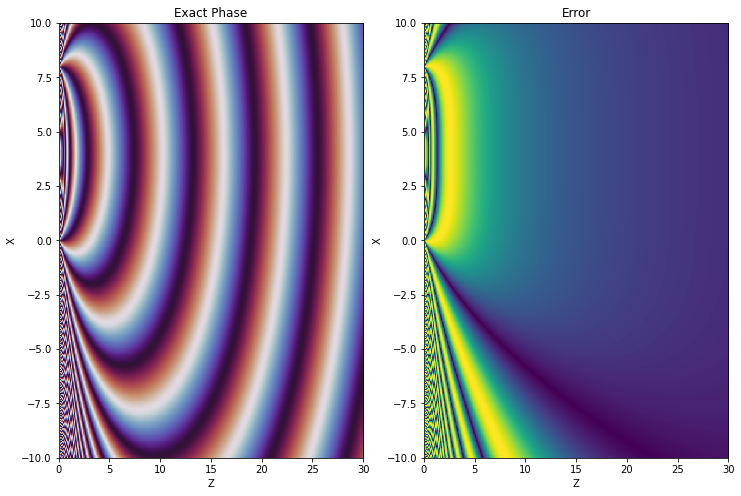

In [6]:
fig, ax = plt.subplots(ncols=2)

fig.set_size_inches(int(1.6*8),8)

#Exact results
ax[0].set_title("Exact Phase")
ax[0].set_ylabel("X")
ax[0].set_xlabel("Z")
ax[0].pcolorfast(z, x,
        np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )

ax[1].set_title(  "Error"  )
ax[1].set_ylabel(  "X"  )
ax[1].set_xlabel(  "Z"  )
ax[1].pcolorfast(z, x,
        np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )


In [7]:
from matplotlib.animation import FuncAnimation, writers
import matplotlib as mpl
from functools import lru_cache

In [8]:
def get_distances(x_prime=4, z_max=30):
    z = np.linspace(0, z_max, 500)
    Z, X = np.meshgrid(z,x)

    r_Fresnel = Z + 1/(  2*Z  )*(  X - x_prime  )**2
    r_Franhofer = Z + 1/(  2*Z  )*(  X**2 - 2*X*x_prime  )
    distances = np.sqrt(  (X-x_prime)**2 + Z**2  )
    return r_Fresnel, r_Franhofer, distances, z

<ipython-input-8-dd8934c7bc09>:5: RuntimeWarning: divide by zero encountered in true_divide
  r_Fresnel = Z + 1/(  2*Z  )*(  X - x_prime  )**2
<ipython-input-8-dd8934c7bc09>:6: RuntimeWarning: divide by zero encountered in true_divide
  r_Franhofer = Z + 1/(  2*Z  )*(  X**2 - 2*X*x_prime  )
MovieWriter ffmpeg unavailable; using Pillow instead.
<ipython-input-9-61cc04a4d062>:16: RuntimeWarning: invalid value encountered in multiply
  np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )
<ipython-input-9-61cc04a4d062>:22: RuntimeWarning: invalid value encountered in multiply
  np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )
<ipython-input-9-61cc04a4d062>:29: RuntimeWarning: invalid value encountered in multiply
  np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )
<ipython-input-9-61cc04a4d062>:35: RuntimeWarning: invalid value encountered in multiply
  np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )
<ipy

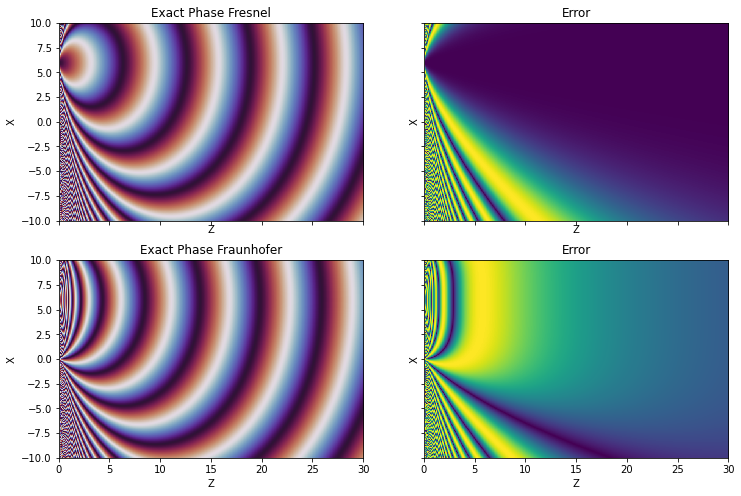

In [9]:
#b

x_prime_array = np.linspace(2,6,50)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
fig.set_size_inches(int(1.6*8),8)

r_Fresnel, r_Franhofer, distances, z = get_distances(2)

def init():
    #Fresnel Plot parameters
    ax[0,0].set_title("Exact Phase Fresnel")
    ax[0,0].set_ylabel("X")
    ax[0,0].set_xlabel("Z")
    ax[0,0].pcolorfast(z, x,
            np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )

    ax[0,1].set_title(  "Error"  )
    ax[0,1].set_ylabel(  "X"  )
    ax[0,1].set_xlabel(  "Z"  )
    ax[0,1].pcolorfast(z, x,
            np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )

    #Fraunhofer
    ax[1,0].set_title("Exact Phase Fraunhofer")
    ax[1,0].set_ylabel("X")
    ax[1,0].set_xlabel("Z")
    ax[1,0].pcolorfast(z, x,
            np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )

    ax[1,1].set_title(  "Error"  )
    ax[1,1].set_ylabel(  "X"  )
    ax[1,1].set_xlabel(  "Z"  )
    ax[1,1].pcolorfast(z, x,
            np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )

@lru_cache
def animate(i):
    x_prime = x_prime_array[i]
    r_Fresnel, r_Franhofer, distances, z = get_distances(x_prime)
    ax[0,0].pcolorfast(z, x, np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )
    ax[0,1].pcolorfast(z, x, np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )
    ax[1,0].pcolorfast(z, x, np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )
    ax[1,1].pcolorfast(z, x, np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )



anim = FuncAnimation(fig, animate, init_func=init, frames=50, interval=20)
anim.save('Fresnel_Fraunhofer_x.gif')

<img src="Fresnel_Fraunhofer_x.gif" />

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-10-d092495e7315>:22: RuntimeWarning: invalid value encountered in multiply
  np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )
<ipython-input-10-d092495e7315>:28: RuntimeWarning: invalid value encountered in multiply
  np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )
<ipython-input-10-d092495e7315>:35: RuntimeWarning: invalid value encountered in multiply
  np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )
<ipython-input-10-d092495e7315>:41: RuntimeWarning: invalid value encountered in multiply
  np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )
<ipython-input-8-dd8934c7bc09>:5: RuntimeWarning: divide by zero encountered in true_divide
  r_Fresnel = Z + 1/(  2*Z  )*(  X - x_prime  )**2
<ipython-input-8-dd8934c7bc09>:6: RuntimeWarning: divide by zero encountered in true_divide
  r_Franhofer = Z + 1/(  2*Z  )*(  X**2 - 2*X*x_prim

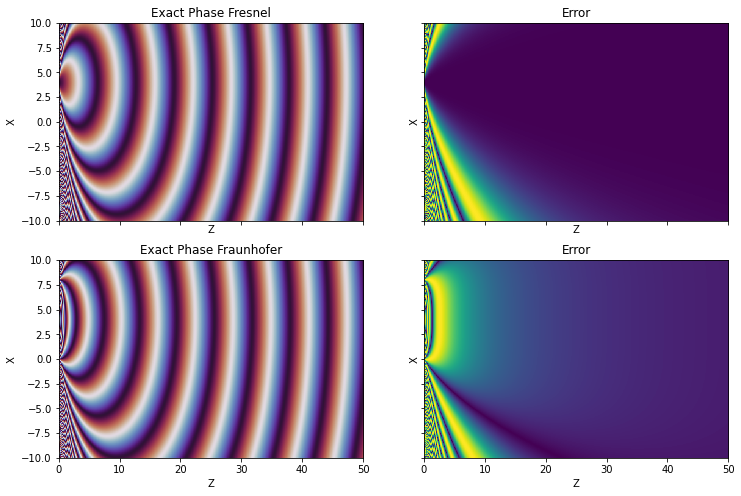

In [10]:
#c

z_max_array = np.linspace(30,50,50)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
fig.set_size_inches(int(1.6*8),8)

x_prime = 4


def init():
    x = np.linspace(-10,10,500)
    z = np.linspace(0,30,500)

    Z, X = np.meshgrid(z,x)

    #Fresnel Plot parameters
    ax[0,0].set_title("Exact Phase Fresnel")
    ax[0,0].set_ylabel("X")
    ax[0,0].set_xlabel("Z")
    ax[0,0].pcolorfast(z, x,
            np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )

    ax[0,1].set_title(  "Error"  )
    ax[0,1].set_ylabel(  "X"  )
    ax[0,1].set_xlabel(  "Z"  )
    ax[0,1].pcolorfast(z, x,
            np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )

    #Fraunhofer
    ax[1,0].set_title("Exact Phase Fraunhofer")
    ax[1,0].set_ylabel("X")
    ax[1,0].set_xlabel("Z")
    ax[1,0].pcolorfast(z, x,
            np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )

    ax[1,1].set_title(  "Error"  )
    ax[1,1].set_ylabel(  "X"  )
    ax[1,1].set_xlabel(  "Z"  )
    ax[1,1].pcolorfast(z, x,
            np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )

def animate(i):
    Z_max = z_max_array[i]
    r_Fresnel, r_Franhofer, distances, z = get_distances(x_prime=4, z_max=Z_max)

    ax[0,0].pcolorfast(z, x, np.angle(  np.exp(  1j*r_Fresnel  )  ), cmap='twilight'  )
    ax[0,1].pcolorfast(z, x, np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Fresnel  )  ), cmap='viridis' )
    ax[1,0].pcolorfast(z, x, np.angle(  np.exp(  1j*r_Franhofer  )  ), cmap='twilight'  )
    ax[1,1].pcolorfast(z, x, np.abs(  np.exp(  1j*distances  ) - np.exp(  1j*r_Franhofer  )  ), cmap='viridis' )



anim = FuncAnimation(fig, animate, init_func=init, frames=50, interval=20)
anim.save('Fresnel_Fraunhofer_z.gif', writer='imagemagick')

<img src="Fresnel_Fraunhofer_z.gif" />